# 1. Domača Naloga

## Naloga 1 (20 točk): Regularizacija Tihonova (Ridge regression)

1.a (5 točk): Dopolni funkciji *najdi_koeficiente* in *napovej*. Funkcija *najdi_koeficiente* naj najde optimalne koeficiente za linearno regresijo in začetno vrednost, funkcija *napovej* pa naj napove ciljno vrednost, glede na dane koeficiente in podatke. Pomagaj si s prosojnicami iz predavanj, funkcijo inverza numpy.linalg.inv(array), funkcijo numpy.concatenate in matričnim množenjem (numpy.matmul(array1, array2) ali @). Pravilnost funkcij lahko preveriš s spodnjo kodo. 

Kakšne vrednosti koeficientov pričakuješ in kakšne si dobil/a? 

In [3]:
import numpy as np

In [4]:
def najdi_koeficiente(x_train: np.array, y_train: np.array) -> np.array:
    # učni algoritem LinR je beta = (X^T X)^-1 X^T y
    # dodamo prvi stolpec, da bomo lahko zračunali začetno vrednost
    x_train_razsirjen = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1)
    # izračunamo X^T X
    produkt = np.matmul(x_train_razsirjen.T, x_train_razsirjen)
    # izračunamo inverz
    inverz = np.linalg.inv(produkt)
    # X^T y
    xty = np.matmul(x_train_razsirjen.T, y_train)

    koeficienti = np.matmul(inverz, xty)

    return koeficienti




def napovej(coefs: np.array, x_test: np.array) -> np.array:
    x_test = np.atleast_2d(x_test)
    
    x_test_razsirjen = np.concatenate([np.ones((x_test.shape[0], 1)), x_test], axis=1)
    # napoved = X * koeficienti
    y_pred = np.matmul(x_test_razsirjen, coefs)

    return y_pred

In [6]:
x = np.random.random((1000, 4))
y = x[:, 0] + 5*x[:, 1]
coefs = najdi_koeficiente(x, y)

print("Koeficienti: ", coefs)
assert coefs.shape == (5,)

print("Napoved za (1, 1, 0, 0):", napovej(coefs, np.array([1, 1, 0, 0])))
assert 6.01 > napovej(coefs, np.array([1, 1, 0, 0])) > 5.99

Koeficienti:  [-2.00027892e-15  1.00000000e+00  5.00000000e+00 -1.12864894e-14
  8.82392934e-15]
Napoved za (1, 1, 0, 0): [6.]


Pričakovala sem koeficiente 0, 1, 5, 0, 0, ker sta samo prvi in drugi stolpec vhodnih podatkov vplivala na ciljno spremenljivko y. Dobljeni koeficienti so zelo blizu pričakovanim.

1.b (4 točke): Preberi podatke iz datoteke "dn1_1.npz" in s 5-kratnim prečnim preverjanjem preveri natančnost linearne regresije (iz naloge 1.a). So koeficienti, ki jih dobiš podobni med različnimi vzorci (folds) množice podatkov?

In [44]:
data = np.load("dn1_1.npz")
X = data["X"]
y = data["y"]

In [45]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

kfold = KFold(n_splits=5)
napake = []
# napake2 = []
koeficienti = np.zeros((5, X.shape[1]+1))
# koeficienti2 = np.zeros((5, X.shape[1]+1))

for i, (train_indeks, test_indeks) in enumerate(kfold.split(X)):
        X_train = X[train_indeks, :]
        X_test = X[test_indeks, :]
        y_train = y[train_indeks]
        y_test = y[test_indeks]

        linr = najdi_koeficiente(X_train, y_train)
        y_pred = napovej(linr, X_test)

        napaka = root_mean_squared_error(y_test, y_pred)
        napake.append(napaka)

        koeficienti[i, :] = linr

        print(f"Koeficienti folda {i+1}: {linr}")
        print(f"RMSE folda {i+1}: {napaka}")

        # primerjava z vgrajeno LinR (zame)
        # model = LinearRegression().fit(X_train, y_train)
        # y_pred2 = model.predict(X_test)
        # napaka2 = mean_squared_error(y_test, y_pred2)
        # napake2.append(napaka2)
        # koeficienti2[i, 0] = model.intercept_
        # koeficienti2[i, 1:] = model.coef_


print(f"Povprečna napaka RMSE: {np.mean(napake)}")
print(f"Varianca napak: {np.var(napake)}")


# print(f"Povprečna napaka RMSE2: {np.mean(napake2)}")
# print(f"Varianca napak2: {np.var(napake2)}")
# print(f"Koeficienti po foldih2: {koeficienti2}")        

Koeficienti folda 1: [ 1.85884348e+01  5.86061961e+02  2.00000000e+00 -1.00000000e+00
 -3.92267891e-13 -5.94705020e+02 -2.00000000e+00]
RMSE folda 1: 7.961979390286286
Koeficienti folda 2: [ 8.31706012e+00  6.08762358e+02  2.00000000e+00 -1.00000000e+00
 -7.84254964e-13 -5.90628818e+02 -2.00000000e+00]
RMSE folda 2: 5.007431858086799
Koeficienti folda 3: [ 1.15884468e+01  3.14660017e+02  2.00000000e+00 -1.00000000e+00
 -4.84397597e-13 -3.18338894e+02 -2.00000000e+00]
RMSE folda 3: 9.009461005732025
Koeficienti folda 4: [ 2.27692462e+01  1.73983053e+02  2.00000000e+00 -1.00000000e+00
 -4.05004741e-13 -1.60219211e+02 -2.00000000e+00]
RMSE folda 4: 13.200581379732547
Koeficienti folda 5: [ 1.08457305e+01  1.87464735e+01  2.00000000e+00 -1.00000000e+00
  1.03051772e-13 -1.45875290e+01 -2.00000000e+00]
RMSE folda 5: 2.342151556118449
Povprečna napaka RMSE: 7.504321037991221
Varianca napak: 13.560945741422723


Vrednosti koeficientov med različnimi foldi so zelo različne. Model je še kar nestabilen, na nekaterih delitvah dela bolje, na drugih slabše.

1.c (4 točke): Koeficienti linearne regresije se med vzorci podatkov zelo razlikujejo, kljub pričakovanju, da temu ne bi bilo tako. Z analizo podatkov ugotovi zakaj se koeficienti linearne regresije zelo razlikujejo med različnimi vzorci? Ugotovitve argumentiraj tako, da izpišeš/ vizualiziraš dejstva o podatkih, ki ugotovitve podpirajo. 

Kako bi spremenili podatke, da zmanjšamo razlike med koeficienti linearne regresije za različne vzorce?

Koeficienti se med različnimi vzorci razlikujejo, ker so stolpci 0, 4 in 5 v matriki X zelo korelirani, kar vidimo iz korelacijske matrike spodaj. To model zmede, ker ni jasno, kaj najbolj vpliva na ciljno spremenljivko.

In [15]:
import pandas as pd

df = pd.DataFrame(X)
print(df.corr())

# nekateri stolpci so močno korelirani => inverz X^T X je numerično nestabilen

          0         1         2         3         4         5
0  1.000000 -0.013828 -0.012727  0.004459  1.000000  0.995059
1 -0.013828  1.000000 -0.006165 -0.006841 -0.013828 -0.014971
2 -0.012727 -0.006165  1.000000 -0.005845 -0.012727 -0.012789
3  0.004459 -0.006841 -0.005845  1.000000  0.004459  0.004681
4  1.000000 -0.013828 -0.012727  0.004459  1.000000  0.995059
5  0.995059 -0.014971 -0.012789  0.004681  0.995059  1.000000


Sedaj še vizualiziramo koreliranost napovednih spremenljivk:

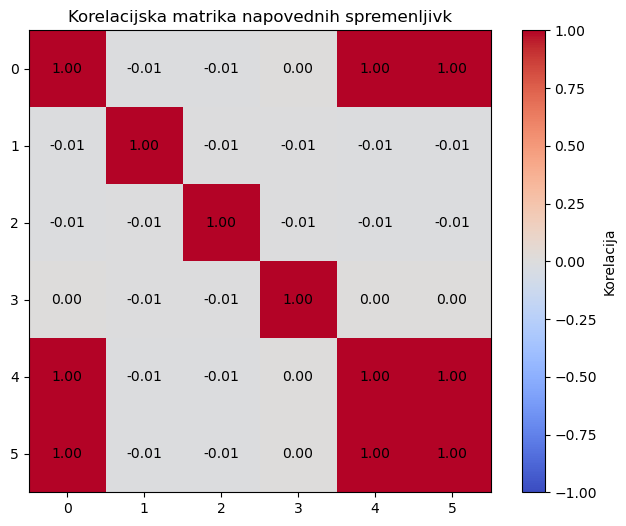

In [34]:
import numpy as np
import matplotlib.pyplot as plt

korelacijska_matrika = df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(korelacijska_matrika, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Korelacija')
plt.title('Korelacijska matrika napovednih spremenljivk')

for i in range(len(korelacijska_matrika)):
    for j in range(len(korelacijska_matrika.columns)):
        value = korelacijska_matrika.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", 
                 ha='center', 
                 va='center', 
                 color='black')
plt.show()


Korelacija stolpcev 0 in 4 je 1.0, 0 in 5 0.995, 4 in 5 prav tako 0.995. Lahko bi odstranili stolpca 0 in 4, ker sta najbolj korelirana, in obdržali le stolpec 5.

1.d (2 točke): Problemov iz prejšnjih delov naloge se lahko izognemo z uporabo regularizacije Tihonova (ridge regression). Dopolni funkcijo *najdi_koeficiente_tihonova*, ki se jo izračuna s formulo $\hat{\beta}_{ridge} = (X^T X + \lambda I)^{-1} X^T y$. Ne pozabi na začetno vrednost.
Pravilnost delovanja funkcije lahko preveriš z dano kodo.

In [42]:
def najdi_koeficiente_tihonova(X, y, lambda_val=1e-8):
    X_razsirjen = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    # izračunamo X^T X
    produkt = np.matmul(X_razsirjen.T, X_razsirjen)
    id = np.eye(X_razsirjen.shape[1])
    # prištejemo
    vsota = produkt + lambda_val*id
    # izračunamo inverz
    inverz = np.linalg.inv(vsota)
    # X^T y
    xty = np.matmul(X_razsirjen.T, y)

    koeficienti_tihonova = np.matmul(inverz, xty)

    return koeficienti_tihonova

In [43]:
x = np.random.random((1000, 4))
y = x[:, 0] + 5*x[:, 1]
coefs = najdi_koeficiente_tihonova(x, y)

print("Koeficienti: ", coefs)
assert coefs.shape == (5,)

print("Napoved za (1, 1, 0, 0):", napovej(coefs, np.array([1, 1, 0, 0])))
assert 6.01 > napovej(coefs, np.array([1, 1, 0, 0])) > 5.99

Koeficienti:  [ 3.54727873e-10  1.00000000e+00  5.00000000e+00 -1.81388589e-12
 -2.19375185e-11]
Napoved za (1, 1, 0, 0): [6.]


1.e (2 točke): Še enkrat ponovi eksperimente iz naloge 1.b, a sedaj namesto linearne regresije uporabi regularizacijo Tihonova. Dobiš sedaj boljše rezultate in bolj primerljive koeficiente med različnimi vzorci?

In [46]:
kfold = KFold(n_splits=5)
napake = []
koeficienti = np.zeros((5, X.shape[1]+1))

for i, (train_indeks, test_indeks) in enumerate(kfold.split(X)):
        X_train = X[train_indeks, :]
        X_test = X[test_indeks, :]
        y_train = y[train_indeks]
        y_test = y[test_indeks]

        linr = najdi_koeficiente_tihonova(X_train, y_train)
        y_pred = napovej(linr, X_test)

        napaka = root_mean_squared_error(y_test, y_pred)
        napake.append(napaka)

        koeficienti[i, :] = linr

        print(f"Koeficienti folda {i+1}: {linr}")
        print(f"RMSE folda {i+1}: {napaka}")

print(f"Povprečna napaka RMSE: {np.mean(napake)}")
print(f"Varianca napak: {np.var(napake)}")

Koeficienti folda 1: [ 1.20323662e+01  2.91717605e+00  2.00000000e+00 -1.00000000e+00
  8.97710757e-11  3.08315450e+00 -1.99999999e+00]
RMSE folda 1: 0.00010352136096536689
Koeficienti folda 2: [ 1.20325430e+01  2.91874046e+00  2.00000000e+00 -1.00000000e+00
  9.27385426e-11  3.08205445e+00 -1.99999999e+00]
RMSE folda 2: 0.0004952332813851393
Koeficienti folda 3: [ 1.20324329e+01  2.92119138e+00  2.00000000e+00 -1.00000000e+00
  8.74810942e-11  3.07970786e+00 -1.99999999e+00]
RMSE folda 3: 0.0004487489468991075
Koeficienti folda 4: [ 1.20320290e+01  2.93635439e+00  2.00000000e+00 -1.00000000e+00
  8.74128429e-11  3.06449062e+00 -1.99999999e+00]
RMSE folda 4: 0.0003321224193639634
Koeficienti folda 5: [ 1.20325633e+01  2.93650695e+00  2.00000000e+00 -1.00000000e+00
  9.03455555e-11  3.06311158e+00 -1.99999999e+00]
RMSE folda 5: 0.00033611503929149763
Povprečna napaka RMSE: 0.000343148209581015
Varianca napak: 1.8374688979897795e-08


Z regularizacijo Tihonova dobimo veliko boljše rezultate, koeficienti med različnimi foldi so zelo podobni, kar vidimo po zelo majhni varianci.

1.f (3 točke): Na spletu si preberi o regularizaciji Tihonova in napiši ključne razlike z linearno regresijo ter glavni razlog za boljše delovanje v našem primeru.

V našem primeru so stolpci 0, 4 in 5 v podatkih močno korelirani, kar povzroči zmedo modela, ker ne ve, katera značilnost dejansko vpliva na ciljno spremenljivko. Zaradi tega matrika X^T X ni dobro obrnljiva in v linearni regresiji to vodi to numerično nestabilne rešitve: majhne spremembe v podatkih (npr. različen fold) lahko povzroči velike spremembe v koeficientih. 
Regularizacija Tihonova prišteje člen lambda*I, ki kaznuje velike koeficiente, ki jih rahlo zmanjša in s tem zmanjša njihov vpliv na ciljno spremenljivko. To stabilizira oceno koeficientov in izboljša delovanje modela.

## Naloga 2 (10 točk): K-najbližjih sosedov

Analiziraj podatke iz datoteke "dn1_2.npz" in sestavi napovedni model k-najbližjih sosedov, ki bo čim boljše napovedal kvaliteto zraka. Poskrbi, da poleg ocene točnosti modela, poročaš tudi o stabilnosti ocene. Opiši, kakšen je tvoj model in kako/zakaj si se odločil za vsako izbiro. Opiši tudi eksperimente, ki si jih poskusil/a, a niso izboljšali rezultata.

Opomba: Pomen spremenljivk je sledeč:
- $x_{1}$: Temperatura (°C)
- $x_{2}$: Vlažnost (%)
- $x_{3}$: Koncentracija PM2,5 (µg/m³); Raven drobnih trdnih delcev
- $x_{4}$: Koncentracija PM10 (µg/m³); Raven grobih trdih delcev.
- $x_{5}$: Koncentracija NO2 (ppb)
- $x_{6}$: Koncentracija SO2 (ppb)
- $x_{7}$: Koncentracija CO (ppm)
- $x_{8}$: Bližina industrijskih območij (km)
- $x_{9}$: Gostota prebivalstva (ljudje/km²)
- $x_{10}$: Čas, ki je pretekel od zadnje meritve (s)
- $y$: Kvaliteta zraka

In [124]:
data2 = np.load("dn1_2.npz")
X = data2["X"]
y = data2["y"]

In [134]:
from sklearn.preprocessing import StandardScaler

# najprej standardiziramo podatke, ker KNN temelji na razdaljah

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# uporabimo stratificirano vzorčenje, da bodo foldi približno enako porazdeljeni

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# nastavimo shuffle=True za večjo točnost

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_vrednosti = range(1, 31)
povprecne_tocnosti = []
k_varianca = []

for k in k_vrednosti:
    tocnosti = []
    
    for (train_indeks, test_indeks) in kfold.split(X_std, y):
        X_train = X_std[train_indeks, :]
        X_test = X_std[test_indeks, :]
        y_train = y[train_indeks]
        y_test = y[test_indeks]

        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        tocnost = accuracy_score(y_test, y_pred)
        tocnosti.append(tocnost)

    povprecne_tocnosti.append(np.mean(tocnosti))
    k_varianca.append(np.var(tocnosti))

naj_k = k_vrednosti[np.argmax(povprecne_tocnosti)]
print(f"Najboljši k: {naj_k}")
print(f"Povprečna točnost: {povprecne_tocnosti[naj_k - 1]}")
print(f"Varianca pri najboljšem k: {k_varianca[naj_k - 1]}")

t1 = povprecne_tocnosti[naj_k - 1]
var1 = k_varianca[naj_k - 1]

Najboljši k: 16
Povprečna točnost: 0.9203999999999999
Varianca pri najboljšem k: 5.3840000000000094e-05


V svojem modelu sem najprej standardizirala podatke, saj model KNN temelji na razdalji med točkami, posamezne spremenljivke pa imajo različne enote, in brez tega bi razdalja temeljila predvsem na značilnostih z večjim razponom. 

Nato sem uporabila stratificirano vzorčenje za 5-kratno prečno preverjanje, ker želimo, da so v vsakem foldu razredi ciljne spremenljivke približno enako porazdeljeni. Paramater shuffle sem nastavila na True, s katerim dobimo raznolike vzorce v vsakem foldu, kar pa potem zmanjša nihanje rezultatov med foldi.

Preizkusila sem k od 1 do 30, za vsako vrednost izračunala povprečno točnost 5 foldov in kot optimalno vrednost izbrala k, kjer je bila dosežena najvišja povprečna točnost. Za večje k nisem preizkušala, ker bi lahko model postal preveč splošen, kar poslabša ločljivost med razredi.
Poleg točnosti sem poročala tudi o pripadajoči varianci za vsako število sosedov k, kar omogoča vpogled v stabilnost ocene.
Najprej sem za najboljši k dobila 8, potem pa sem poskusila še obtežiti teh najbližjih k točk tako, da bližje kot je sosed, večjo utež dobi, in to se je izkazalo za uspešno, saj se je povprečna točnost povečala, varianca pri tem k pa zmanjšala, novi najboljši k je bil enak 16.


V nadaljevanju sem s sledečo kodo preverila še, ali so katere izmed napovednih spremenljivk zelo korelirane.

In [116]:
df = pd.DataFrame(X)

kor_matrika = df.corr()
meja = 0.95

visoko_korelirani_stolpci = []

for i in range(len(kor_matrika.columns)):
    for j in range(i + 1, len(kor_matrika.columns)):
        korelacija = kor_matrika.iloc[i, j]
        if abs(korelacija) > meja:
            visoko_korelirani_stolpci.append((kor_matrika.columns[i], kor_matrika.columns[j], korelacija))

print(f"Visoko korelirani stolpci (|korelacija| > {meja}):")
for st1, st2, kor in visoko_korelirani_stolpci:
    print(f"Korelacija med {st1}. in {st2}. stolpcem: {kor}")

0    0.425690
1    0.359156
2    0.973005
3    1.000000
4    0.439916
5    0.401849
6    0.518895
7   -0.425018
8    0.365734
9    0.003251
Name: 3, dtype: float64
Visoko korelirani stolpci (|korelacija| > 0.95):
Korelacija med 2. in 3. stolpcem: 0.9730048883255122


Zelo korelirana sta 2. in 3. stolpec, zato sem poskusila enega izmed njiju odstraniti iz podatkov in znova preveriti točnost modela:

In [112]:
# reduciramo podatkovno množico
X_red1 = np.delete(X, 3, axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X_red1)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_vrednosti = range(1, 31)
povprecne_tocnosti = []
k_varianca = []

for k in k_vrednosti:
    tocnosti = []
    
    for (train_indeks, test_indeks) in kfold.split(X_std, y):
        X_train = X_std[train_indeks, :]
        X_test = X_std[test_indeks, :]
        y_train = y[train_indeks]
        y_test = y[test_indeks]

        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        tocnost = accuracy_score(y_test, y_pred)
        tocnosti.append(tocnost)

    povprecne_tocnosti.append(np.mean(tocnosti))
    k_varianca.append(np.var(tocnosti))

naj_k = k_vrednosti[np.argmax(povprecne_tocnosti)]
print(f"Najboljši k: {naj_k}")
print(f"Povprečna točnost: {povprecne_tocnosti[naj_k - 1]}")
print(f"Varianca pri najboljšem k: {k_varianca[naj_k - 1]}")

t2 = povprecne_tocnosti[naj_k - 1]
var2 = k_varianca[naj_k - 1]

Najboljši k: 14
Povprečna točnost: 0.9212000000000001
Varianca pri najboljšem k: 8.936000000000016e-05


In [113]:
print(f"Absolutna vrednost razlike med točnostima: {np.abs(t1 - t2)}")
print(f"Absolutna vrednost razlike varianc: {np.abs(var1 - var2)}")

Absolutna vrednost razlike med točnostima: 0.000800000000000245
Absolutna vrednost razlike varianc: 3.5520000000000066e-05


Po odstranitvi ene izmed zelo koreliranih spremenljivk se točnost rahlo poviša, ampak dobimo pa tudi rahlo večjo varianco. Ker pa je razlika tako majhna, bi rekla, da sta modela enako dobra, in odstranjevanje tega enega stolpca ne vpliva na točnost rezultata.

Vsebinsko gledano se zdi, da to, kdaj je bila opravljena zadnja meritev, ne vpliva na kvaliteto zraka, zato odstranimo zadnji stolpec in preverimo, ali to kaj vpliva na točnost in stabilnost modela:

In [131]:
# odstranimo x_10
X_red2 = np.delete(X, 9, axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X_red2)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_vrednosti = range(1, 31)
povprecne_tocnosti = []
k_varianca = []

for k in k_vrednosti:
    tocnosti = []
    
    for (train_indeks, test_indeks) in kfold.split(X_std, y):
        X_train = X_std[train_indeks, :]
        X_test = X_std[test_indeks, :]
        y_train = y[train_indeks]
        y_test = y[test_indeks]

        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        tocnost = accuracy_score(y_test, y_pred)
        tocnosti.append(tocnost)

    povprecne_tocnosti.append(np.mean(tocnosti))
    k_varianca.append(np.var(tocnosti))

naj_k = k_vrednosti[np.argmax(povprecne_tocnosti)]
print(f"Najboljši k: {naj_k}")
print(f"Povprečna točnost: {povprecne_tocnosti[naj_k - 1]}")
print(f"Varianca pri najboljšem k: {k_varianca[naj_k - 1]}")

t3 = povprecne_tocnosti[naj_k - 1]
var3 = k_varianca[naj_k - 1]


Najboljši k: 12
Povprečna točnost: 0.925
Varianca pri najboljšem k: 5.4000000000000086e-05


In [132]:
print(f"Absolutna vrednost razlike med točnostima: {np.abs(t1 - t3)}")
print(f"Absolutna vrednost razlike varianc: {np.abs(var1 - var3)}")

Absolutna vrednost razlike med točnostima: 0.0046000000000001595
Absolutna vrednost razlike varianc: 1.599999999999917e-07


Točnost se poveča za 0.46%, varianca pa se sicer tudi poveča, ampak je sprememba tako majhna, da je zanemarljiva. Torej je v našem primeru bolje ne upoštevati spremenljivke x_10, in tako dobimo, da je optimalen k=12.